# Домашенее задание 2 по ЧМ.

## Постановка задачи

Задача Дирихле для уравнения Пуассона.

$$
\begin{array}{l}
\Delta{u} = 4, \; x \in (0;1), \; y \in (0;1), \\
\left.u\right|_{x = 0} = y^2, \; \left.u\right|_{x = 1} = 1 + y^2, \; \left.u\right|_{y = 0} = x^2, \; \left.u\right|_{y = 1} = 1 + x^2. \\
\end{array}$$

## Сетка

В такой задаче область задаётся в виде квадрата со стороной 1. Сетку будем задавать так же: квадратом со стороной размером в фиксированный шаг по $h$ и $\tau$

In [ ]:
import numpy as np
from scipy import linalg
import matplotlib
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import seaborn as sns
sns.set()

## Схема

Для того, чтобы численно решить эту задачу, введём сетку на двумерной области её определения и запишем задачу на пятиточечном шаблоне.

$$
\frac{y_{i + 1, j} - 2y_{i, j} + y_{i - 1, j}}{h^2} + \frac{y_{i, j + 1} - 2y_{i, j} + y_{i, j - 1}}{h^2} =
4.$$

Граничные условия для сеточной функции $y$ примут вид:
$$y_{0, j} = y_j^2,\;y_{N, j} = 1 + y_j^2,\;y_{i, 0} = x_i^2,\;y_{i, N} = 1 + x_i^2$$

In [ ]:
def seidel_poisson(step, true_solution, tol=1e-3):
    """ Solves Poisson equation `Δu = 4` with Seidel method.

    Parameters
    ----------
    step : float
       Spatial step
    tol : float, optional
       Tolerance for Seidel iterations
    """

    N = int(1/step) # Number of steps
    M = (N + 1)**2
    y, A, b = np.zeros(M), np.eye(M), np.full(M, 4*step**2)

    # I'm solving via matrix method assuming Ax = b

    for i in range(N + 1): # Creating b vecotr
        b[i] = (i * step)**2
        b[N + i*(N + 1)] = b[i + N*(N+1)] = 1 + (i*step)**2
        b[i*(N + 1)] = (i * step)**2

    for j in range(1, N): # Creating A matrix
        for i in range(j*(N + 1) + 1, N + j*(N + 1)):
            A[i, i] = -4.
            A[i, i+1], A[i,i-1] = 1., 1.
            A[i, i+N+1], A[i, i-N-1] = 1., 1.

    previous_u, U, L = np.zeros(M), np.triu(A, k=1), np.triu(A.T).T

    error = 1
    iteration_errors, solution_errors = list(), list()

    while error > tol: # Breakpoint
        current_u = linalg.solve_triangular(L, -U @ previous_u + b,  lower=True)
        error = np.linalg.norm(current_u - previous_u)*step # Recalculate error
        iteration_errors.append(error)
        solution_errors.append(np.linalg.norm(current_u - true_solution.flatten())*step) # Calculate solution erros
        previous_u = current_u

    current_u = current_u.reshape((N + 1, N + 1))

    return current_u, iteration_errors, solution_errors

Полученный таким решением ответ:

In [ ]:
def true_solution(x,y):
    return x**2 + y**2

x_grid = y_grid = np.arange(0, 1.1, 0.1)

ans, iteration_errors, solution_errors = seidel_poisson(0.1, true_solution(x_grid[:, None], y_grid[None, :]))

np.around(ans, decimals=2) # Round up values

array([[0.  , 0.01, 0.04, 0.09, 0.16, 0.25, 0.36, 0.49, 0.64, 0.81, 1.  ],
       [0.01, 0.02, 0.05, 0.09, 0.16, 0.25, 0.36, 0.5 , 0.65, 0.82, 1.01],
       [0.04, 0.05, 0.07, 0.12, 0.19, 0.28, 0.39, 0.52, 0.67, 0.85, 1.04],
       [0.09, 0.09, 0.12, 0.17, 0.23, 0.32, 0.44, 0.57, 0.72, 0.9 , 1.09],
       [0.16, 0.16, 0.19, 0.23, 0.3 , 0.39, 0.5 , 0.64, 0.79, 0.97, 1.16],
       [0.25, 0.25, 0.28, 0.32, 0.39, 0.48, 0.59, 0.73, 0.88, 1.06, 1.25],
       [0.36, 0.36, 0.39, 0.44, 0.5 , 0.59, 0.71, 0.84, 0.99, 1.17, 1.36],
       [0.49, 0.5 , 0.52, 0.57, 0.64, 0.73, 0.84, 0.97, 1.12, 1.3 , 1.49],
       [0.64, 0.65, 0.67, 0.72, 0.79, 0.88, 0.99, 1.12, 1.28, 1.45, 1.64],
       [0.81, 0.82, 0.85, 0.9 , 0.97, 1.06, 1.17, 1.3 , 1.45, 1.62, 1.81],
       [1.  , 1.01, 1.04, 1.09, 1.16, 1.25, 1.36, 1.49, 1.64, 1.81, 2.  ]])

Истинный (так как известно, что решением является $u(x_1, x_2) = x_1^2 + x^2_2$

In [ ]:
true_solution(x_grid[:, None], y_grid[None, :])

array([[0.  , 0.01, 0.04, 0.09, 0.16, 0.25, 0.36, 0.49, 0.64, 0.81, 1.  ],
       [0.01, 0.02, 0.05, 0.1 , 0.17, 0.26, 0.37, 0.5 , 0.65, 0.82, 1.01],
       [0.04, 0.05, 0.08, 0.13, 0.2 , 0.29, 0.4 , 0.53, 0.68, 0.85, 1.04],
       [0.09, 0.1 , 0.13, 0.18, 0.25, 0.34, 0.45, 0.58, 0.73, 0.9 , 1.09],
       [0.16, 0.17, 0.2 , 0.25, 0.32, 0.41, 0.52, 0.65, 0.8 , 0.97, 1.16],
       [0.25, 0.26, 0.29, 0.34, 0.41, 0.5 , 0.61, 0.74, 0.89, 1.06, 1.25],
       [0.36, 0.37, 0.4 , 0.45, 0.52, 0.61, 0.72, 0.85, 1.  , 1.17, 1.36],
       [0.49, 0.5 , 0.53, 0.58, 0.65, 0.74, 0.85, 0.98, 1.13, 1.3 , 1.49],
       [0.64, 0.65, 0.68, 0.73, 0.8 , 0.89, 1.  , 1.13, 1.28, 1.45, 1.64],
       [0.81, 0.82, 0.85, 0.9 , 0.97, 1.06, 1.17, 1.3 , 1.45, 1.62, 1.81],
       [1.  , 1.01, 1.04, 1.09, 1.16, 1.25, 1.36, 1.49, 1.64, 1.81, 2.  ]])

Ошибка решения составила:

In [ ]:
print(f'Without step multiplying {np.linalg.norm(ans - true_solution(x_grid[:, None], y_grid[None, :]))}')
print(f'With step multiplying {np.linalg.norm(ans - true_solution(x_grid[:, None], y_grid[None, :]))*0.1}')

Without step multiplying 0.09101808085446499
With step multiplying 0.009101808085446498


Посмотрим на то, что получилось

Ошибка между итерациями и итерацией и истинным ответом изменялась следующим образом:

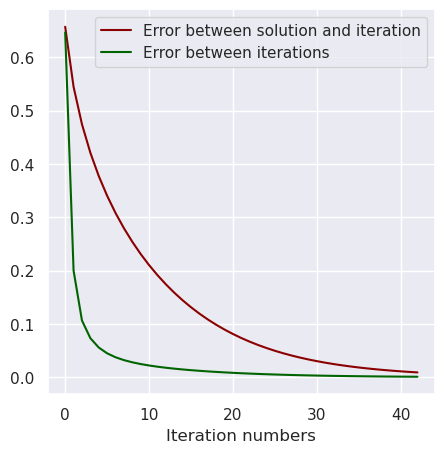

In [ ]:
plt.figure(figsize=(5,5))
plt.xlabel("Iteration numbers")
plt.plot(solution_errors, label="Error between solution and iteration", color='darkred')
plt.plot(iteration_errors, label="Error between iterations", color='darkgreen')
plt.legend()
plt.show()

Поверхность, полученная после вычислений, выглядит следующим образом:

/tmp/ipykernel_60865/289706380.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


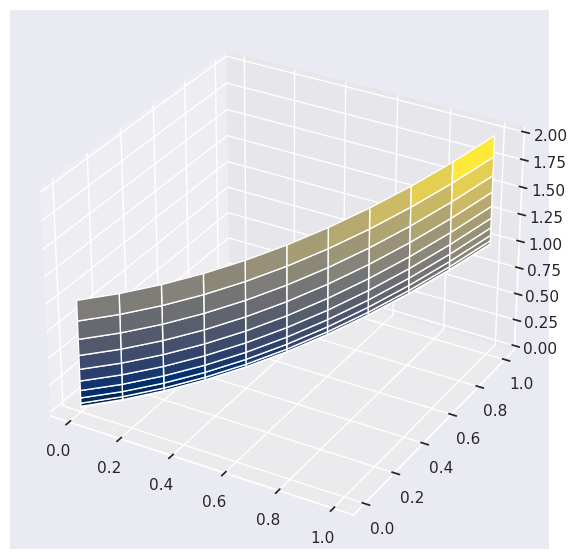

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.gca(projection='3d')
surface = ax.plot_surface(x_grid, y_grid, ans, cmap='cividis')

/tmp/ipykernel_60865/977833256.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


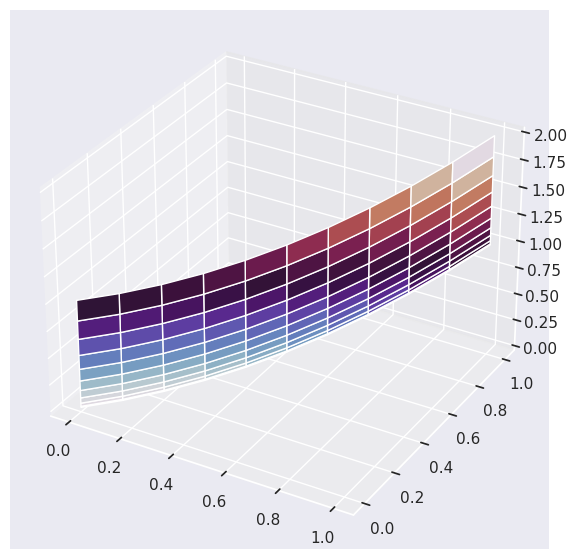

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.gca(projection='3d')
surface = ax.plot_surface(x_grid, y_grid, true_solution(x_grid[:, None], y_grid[None, :]), cmap='twilight')

Если совместить графики:

/tmp/ipykernel_60865/2363849184.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


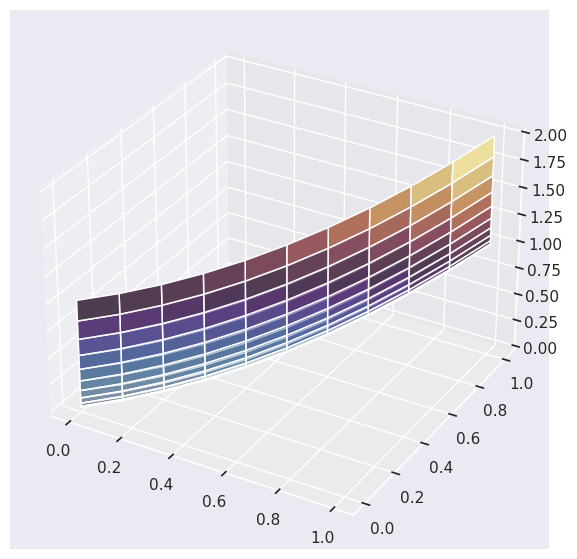

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.gca(projection='3d')
surface = ax.plot_surface(x_grid, y_grid, ans, cmap="cividis")
surface = ax.plot_surface(x_grid, y_grid, true_solution(x_grid[:, None], y_grid[None, :]), cmap='twilight', alpha=0.6)

Видно, что графики поверхностей идеально наложились друг на друга